In [1]:
import tensorflow as tf
mnist = tf.keras.datasets.mnist

In [2]:
(x_train, y_train),(x_test, y_test) = mnist.load_data()

In [3]:
x_train = x_train / 255.0
x_test = x_test / 255.0

In [4]:
x_train.shape

(60000, 28, 28)

In [5]:
x_test.shape

(10000, 28, 28)

In [6]:
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Flatten(input_shape=(28, 28)))
model.add(tf.keras.layers.Dense(256, activation=tf.nn.relu))
model.add(tf.keras.layers.Dense(10, activation=tf.nn.softmax))

In [7]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 256)               200960    
_________________________________________________________________
dense_1 (Dense)              (None, 10)                2570      
Total params: 203,530
Trainable params: 203,530
Non-trainable params: 0
_________________________________________________________________


Using TensorFlow backend.


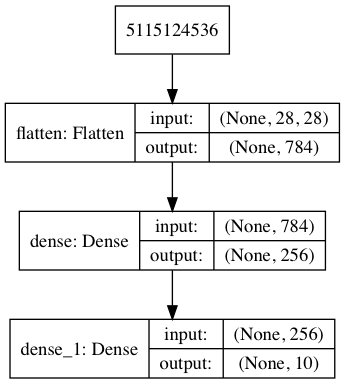

In [8]:
from keras.utils import plot_model
plot_model(model, to_file='model.png', show_shapes=True)
from IPython.display import Image
Image("model.png")

In [9]:
784 * 10 + 10

7850

In [10]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [11]:
model.fit(x_train, y_train, epochs=5)

Epoch 1/5
60000/60000 [==============================] - 5s 90us/step - loss: 0.2247 - acc: 0.9345
Epoch 2/5
60000/60000 [==============================] - 5s 84us/step - loss: 0.0925 - acc: 0.9716
Epoch 3/5
60000/60000 [==============================] - 5s 78us/step - loss: 0.0616 - acc: 0.9807
Epoch 4/5
60000/60000 [==============================] - 5s 80us/step - loss: 0.0459 - acc: 0.9859
Epoch 5/5
60000/60000 [==============================] - 5s 79us/step - loss: 0.0325 - acc: 0.9894: 1s 


### *Real World Challenge*: Large difference between training and testing set accuracy

#### Test accuracy

In [17]:
score1 = model.evaluate(x_test, y_test)

10000/10000 [==============================] - 0s 33us/step


#### Training accuarcy

In [19]:
score2 = model.evaluate(x_train, y_train)

60000/60000 [==============================] - 2s 27us/step


In [23]:
print('Test Accuracy : {} VS Training Accuracy : {}'.format(score1[1], score2[1]))

Test Accuracy : 0.9786 VS Training Accuracy : 0.9939166666666667
